# Exploratory analysis of ATAC-seq data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import hdf5plugin

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
CHROMOSOME = "chr1"

In [4]:
f = h5py.File("../data/train_multi_inputs.h5")

In [5]:
atac_peak_names = f["train_multi_inputs"]["axis0"].asstr()[:]

In [6]:
atac_peak_names = pd.Series(atac_peak_names)

In [7]:
c_names = atac_peak_names.str.startswith(CHROMOSOME + ":")
c_data = f["train_multi_inputs"]["block0_values"][:, c_names.values]
c_shape = c_names.sum()

In [8]:
c_data.shape

(105942, 21706)

In [9]:
non_zeros_by_gene = (c_data != 0).sum(axis=0)

In [10]:
non_zeros_by_cell = (c_data != 0).sum(axis=1)

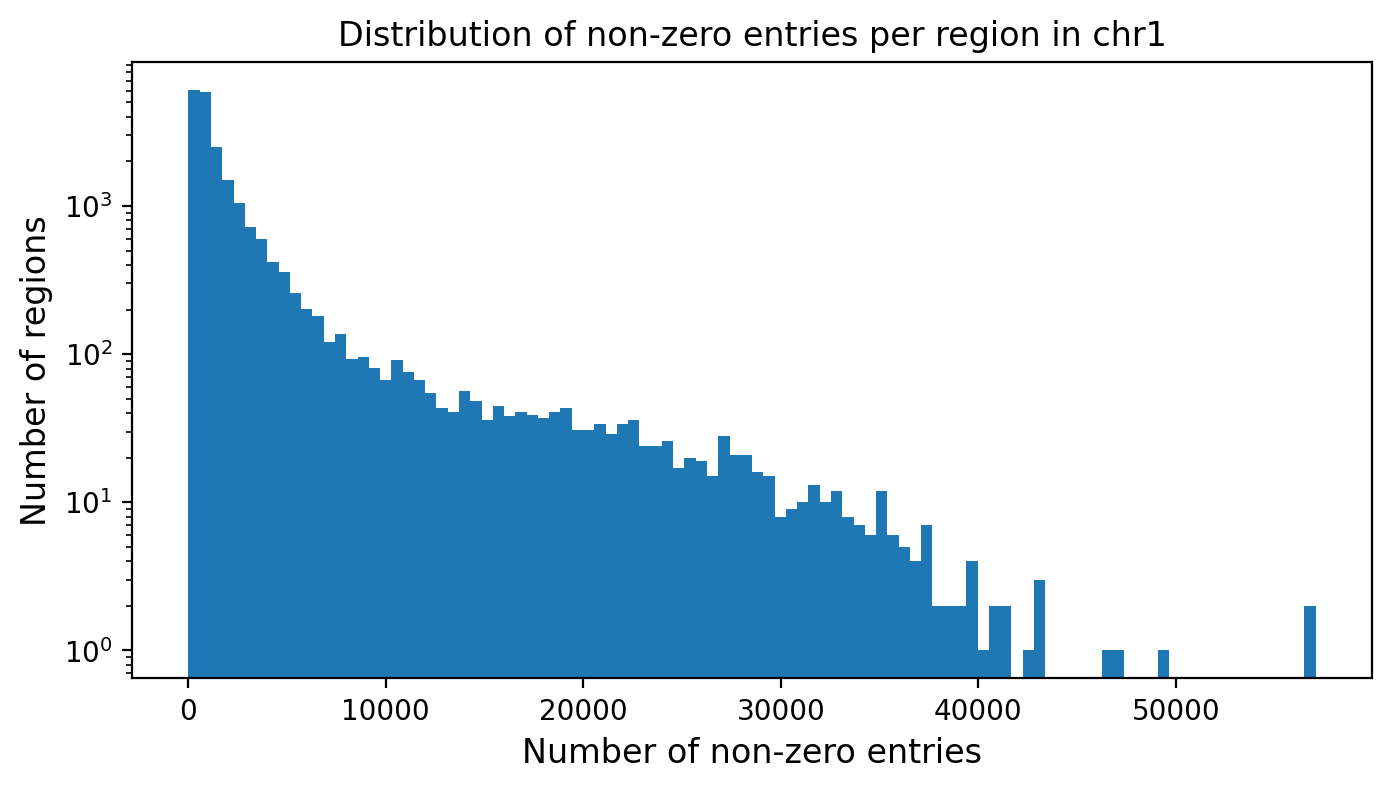

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(non_zeros_by_gene, bins=100);
ax.set_yscale("log")
ax.set_xlabel("Number of non-zero entries", size=12)
ax.set_ylabel("Number of regions", size=12)
ax.set_title("Distribution of non-zero entries per region in chr1");

Let's zoom in closer to 0

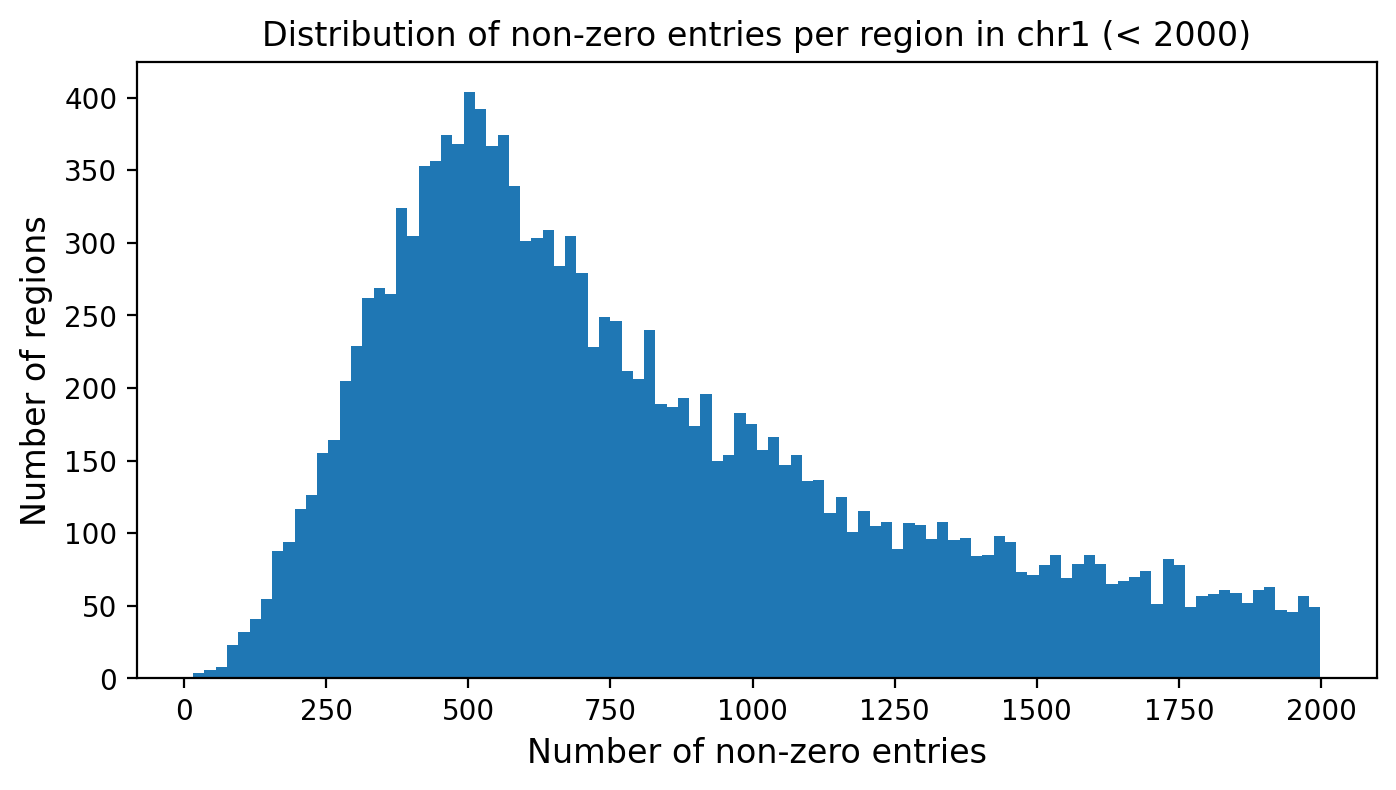

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(non_zeros_by_gene[non_zeros_by_gene < 2000], bins=100);
ax.set_xlabel("Number of non-zero entries", size=12)
ax.set_ylabel("Number of regions", size=12)
ax.set_title("Distribution of non-zero entries per region in chr1 (< 2000)");

In [14]:
print(f"Number of all-zero regions: {(non_zeros_by_gene == 0).sum()}")

Number of all-zero regions: 0


**Conclusion**

All regions in chromosome 1 have some counts associated with them.

The majority of regions have around 500 cells with positive counts, and then this number log-linearly declines towards few regions that are detected in half of the dataset.

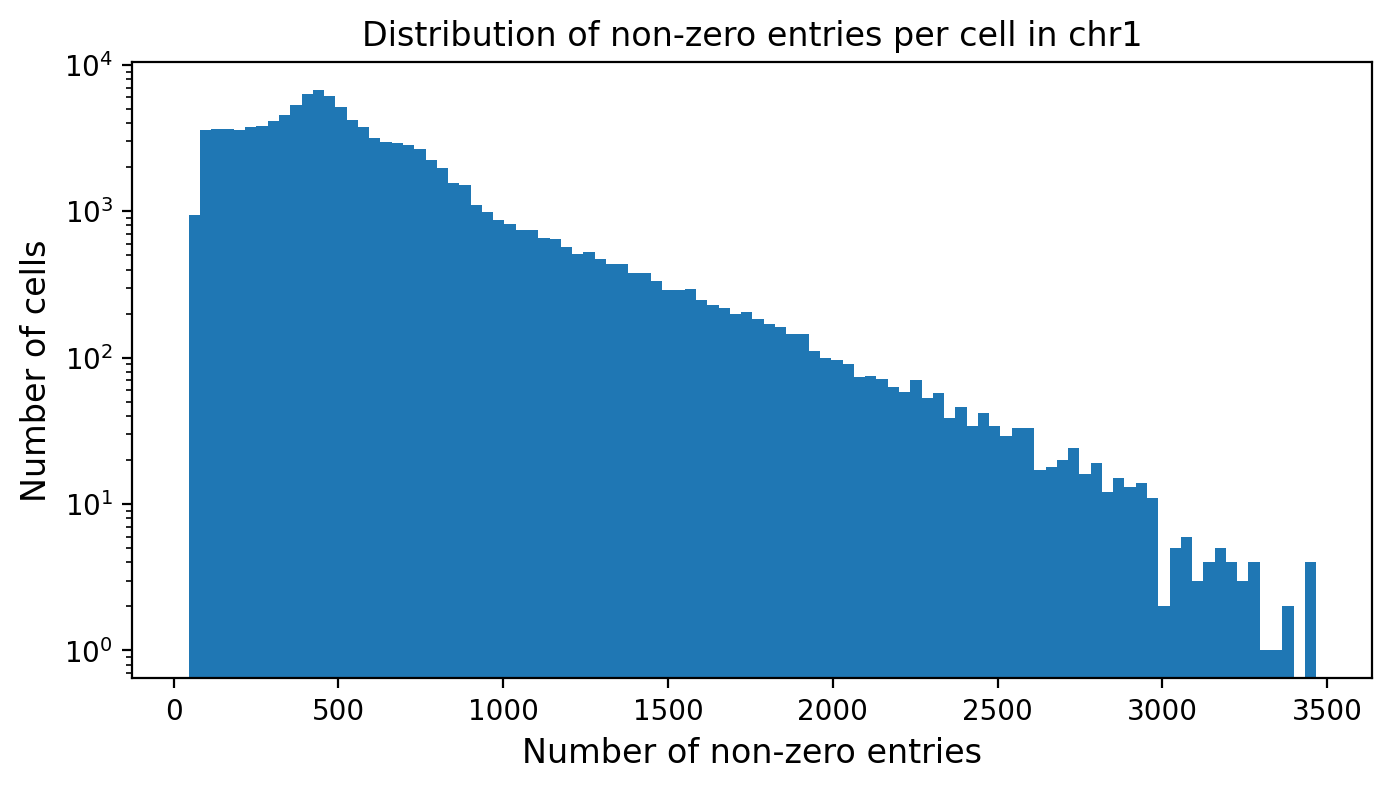

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(non_zeros_by_cell, bins=100);
ax.set_yscale("log")
ax.set_xlabel("Number of non-zero entries", size=12)
ax.set_ylabel("Number of cells", size=12)
ax.set_title("Distribution of non-zero entries per cell in chr1");

In [16]:
non_zeros_by_cell.min()

46

**Conclusion**

All cells have at least 46 regions detected on chromosome 1, the mode is at 500 regions, and then it log-linearly declines to 3500 regions detected for a few cells.

Variance for non-zero elements

In [23]:
var_by_gene = np.ma.array(c_data, mask=(c_data == 0)).var(axis=0)

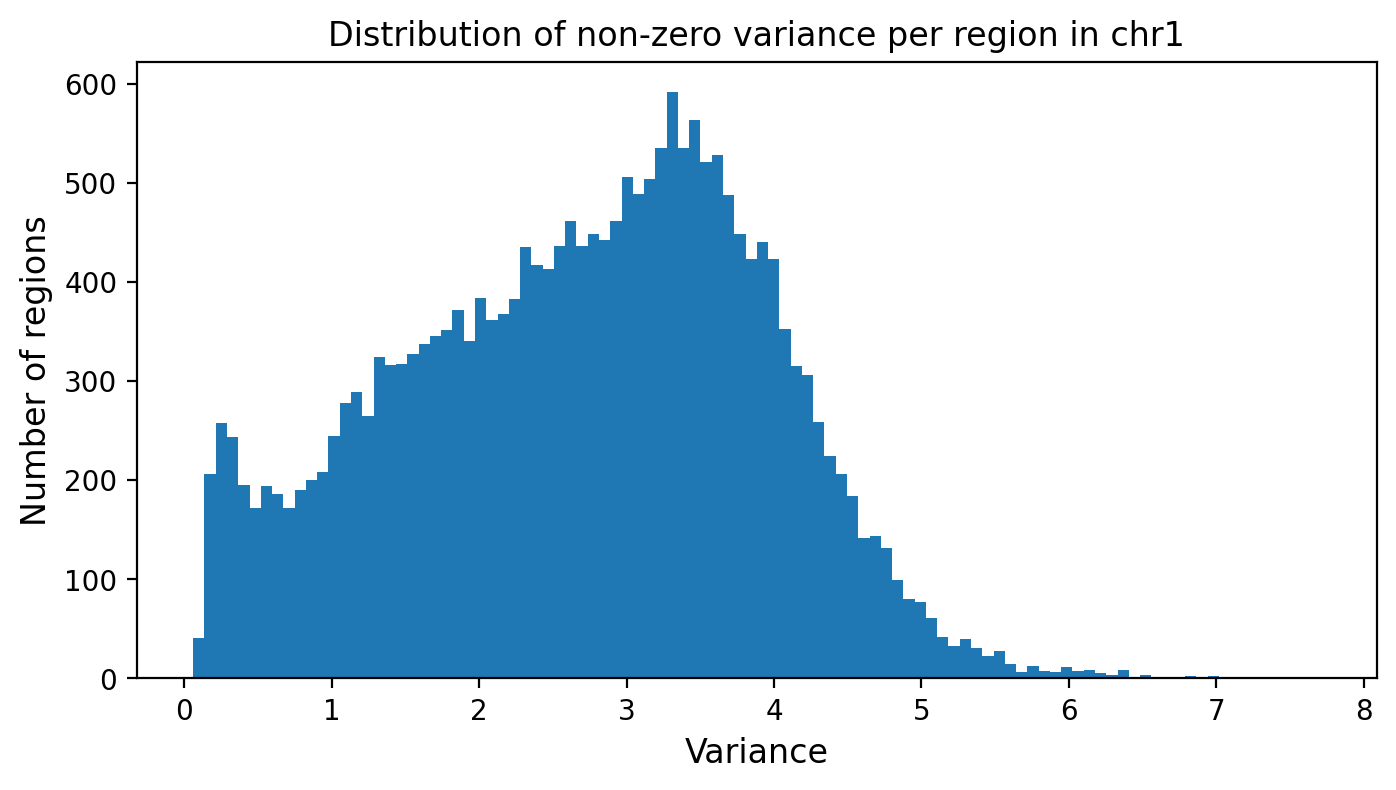

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(var_by_gene, bins=100);
# ax.set_yscale("log")
ax.set_xlabel("Variance", size=12)
ax.set_ylabel("Number of regions", size=12)
ax.set_title("Distribution of non-zero variance per region in chr1");

In [25]:
var_by_cell = np.ma.array(c_data, mask=(c_data == 0)).var(axis=1)

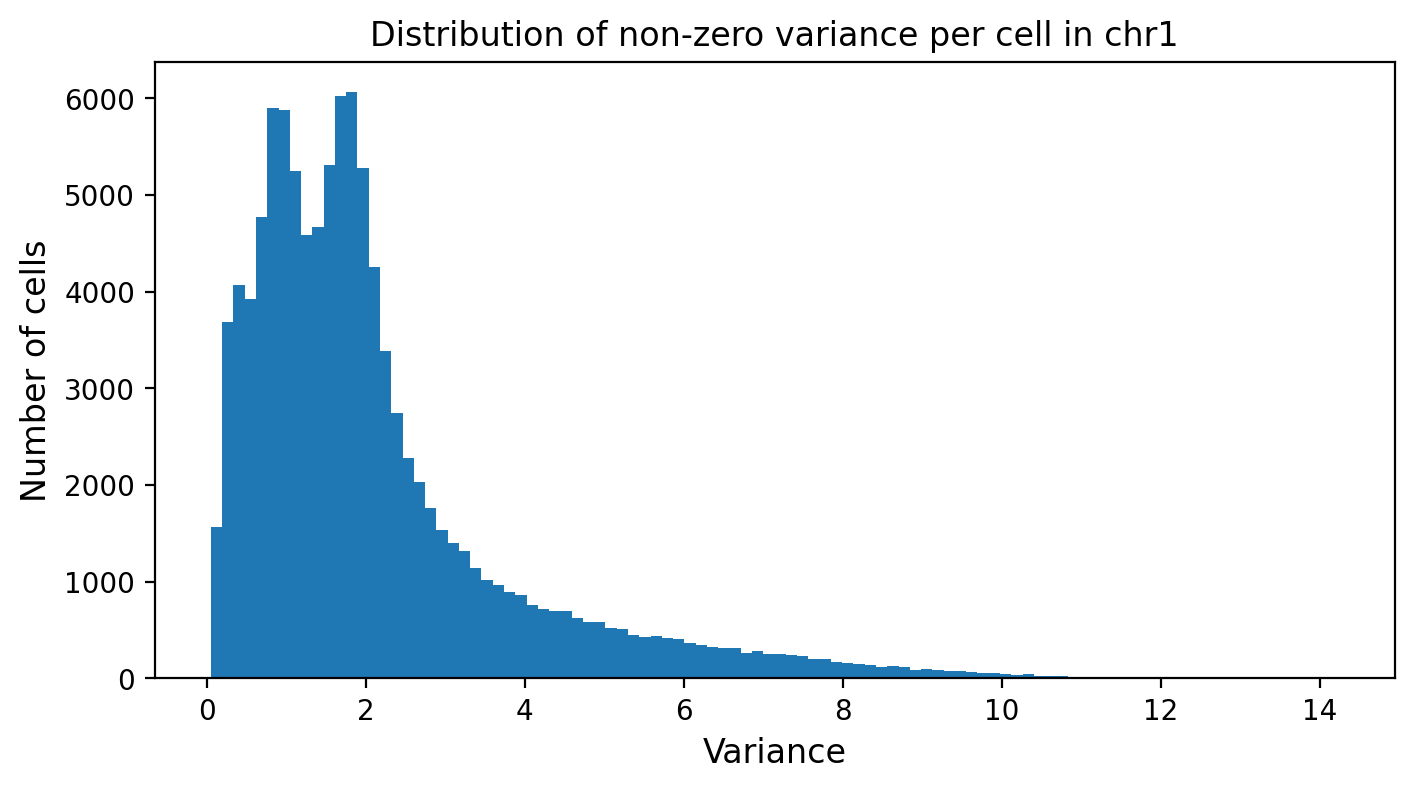

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(var_by_cell, bins=100);
# ax.set_yscale("log")
ax.set_xlabel("Variance", size=12)
ax.set_ylabel("Number of cells", size=12)
ax.set_title("Distribution of non-zero variance per cell in chr1");

**Conclusion**

Interestingly, variance across regions _and_ across cells is bimodal.

For regions, the low peak is around 0.2, while the mode is around 3.

For cells, the peaks are at 1 and 2 approx, with a heavier right tail.